# Pymaceuticals Inc.
---

### Analysis

-In a study of squamous cell carcinoma, our scientists identified 249 mice with SCC tumors and treated them with a range of drug treatments. We are interested in the performance of Capomulin compared to other drug treatments. In preparation for this project, I prepared the data given to me by the scientists to be useful in analysis. This required merging our data into a single dataframe and removing all duplicate Mouse ID information. 

Analysis of the summary statistics of each drug regimen reveals that the mea and median tumor size after Capomulin treatment is smaller than tumors of every other drug regimen except for Ramicane. Capomulin's variance and standard deviation is smaller than every regimen except for Ramicane's as well.

To further analyze the data, I have created a number of charts and models to better visualize the data. Our bar charts show the number of recorded timepoints for each drug regimen. Showing that Capomulin and Ramicane have the highest recorded numbers. The pie charts generated show the sex ratio of the mice, showing a 51% to 49% male-female ratio.

Calculating the quartiles and outliers of the data paints a bigger picture of all of the data, we can see that Capomulin and Ramicane produce far better results than other regimens, such as Infubinol and Ceftamin. One mouse was an outlier in Infubinol, whos tumor size was more comparable to those mice treated with Capomulin and Ramicane. Though as an outlier, this data is an exception, and shouldn't be used to classify Infubinol as effective as Capomulin and Ramicane.

To get a better idea of how Capomulin works and how long it takes to be effective, we looked at the data of one mouse's tumor size and its relationship with time. We found that Capomulin begins to take effect around the 20th day, and between 20 and 35 days the tumor significantly decreases in its overall size. 

In order to see if other variables play a role in tumor size, we created a scatter plot to observe correlation between tumor size and the weight of the mouse. This revealed a positive correlation, the heavier the mouse, the larger the tumor. Upon performing a linear regression model and calculating a correlation coefficient, we discover a correlation of 0.84. This shows that mouse weight has a significant effect on tumor size. It would be very important to make sure the average weight of the mice is the same across all the different drugs regimens with which mice were treated, or else the data could be innacurate.

Overall, this study revealed that Capomulin is very effective against squamous cell carcinoma, beating out all drug regimens except for Ramicane, which it produced very similar results for.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview
merge_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_of_mice = merge_data["Mouse ID"].nunique()
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_data[merge_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_mice['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = merge_data[merge_data['Mouse ID'].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_data[merge_data['Mouse ID'].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_clean = clean_data["Mouse ID"].nunique()
number_of_mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_stats = merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

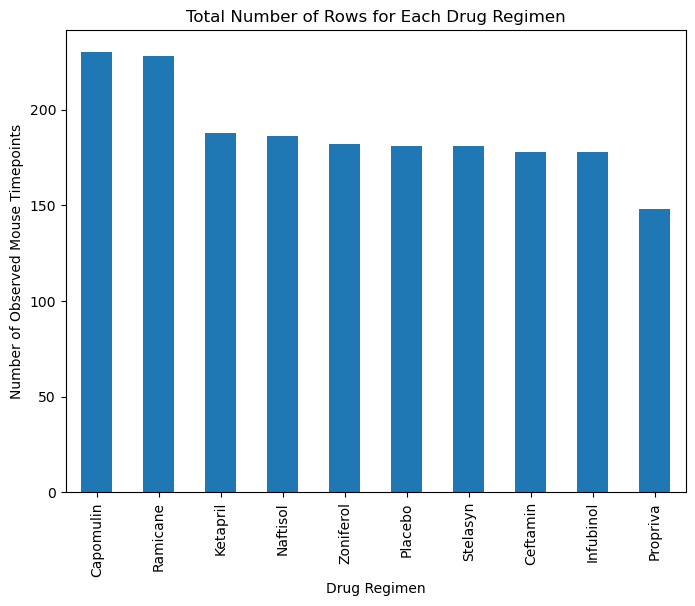

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_x_drug = clean_data.groupby('Drug Regimen').size().sort_values(ascending=False)

timepoint_x_drug.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.show()

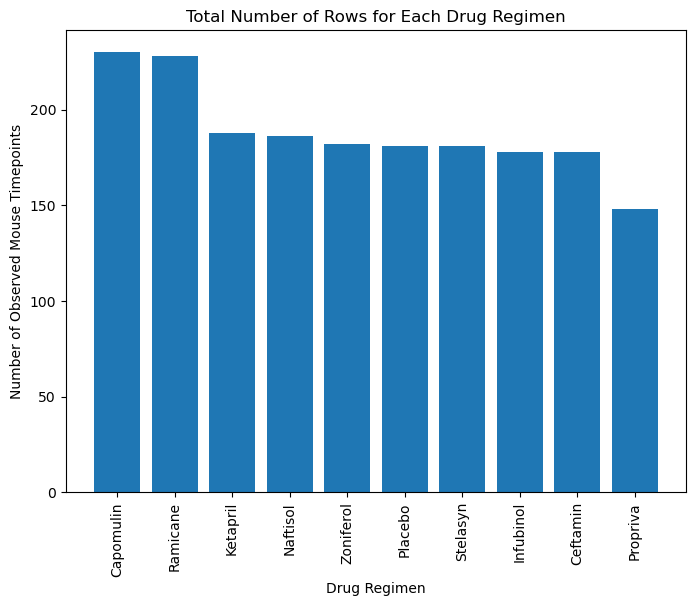

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=90)
plt.show()

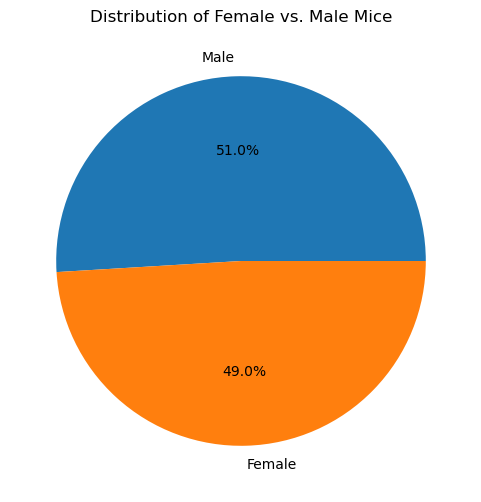

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = clean_data['Sex'].value_counts()

gender_counts.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')
plt.show()

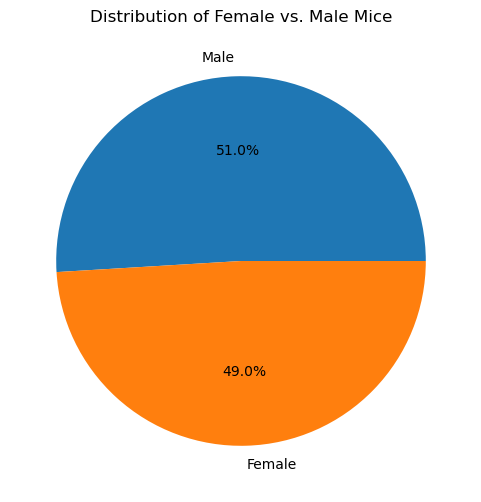

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Female vs. Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
selected = clean_data[clean_data["Drug Regimen"].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
selected = selected[selected["Timepoint"] == 45]
selected = selected.groupby("Drug Regimen").head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
selected = pd.merge(selected, clean_data[clean_data["Drug Regimen"].isin(treatments)])


In [14]:
max_tumor = clean_data.groupby("Mouse ID")["Timepoint"].max()
max_tumor = max_tumor.reset_index()
max_tumor

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [15]:
merge_dataframe = max_tumor.merge(clean_data,on=["Mouse ID", "Timepoint"],how="left")
merge_dataframe

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [16]:
tumor_vol_data = []

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = merge_dataframe.loc[merge_dataframe['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(subset)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]
    print(f"Outliers for {treatment}: {outliers}")


Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


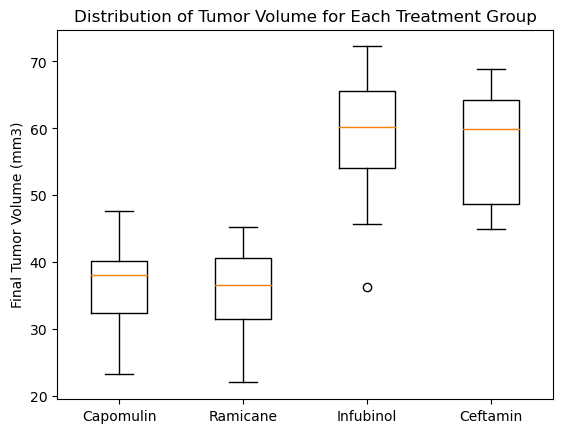

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = []
for treatment in treatments:
    data.append(merge_dataframe[merge_dataframe["Drug Regimen"] == treatment]["Tumor Volume (mm3)"].tolist())

plt.boxplot(tumor_vol_data, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.show()

## Line and Scatter Plots

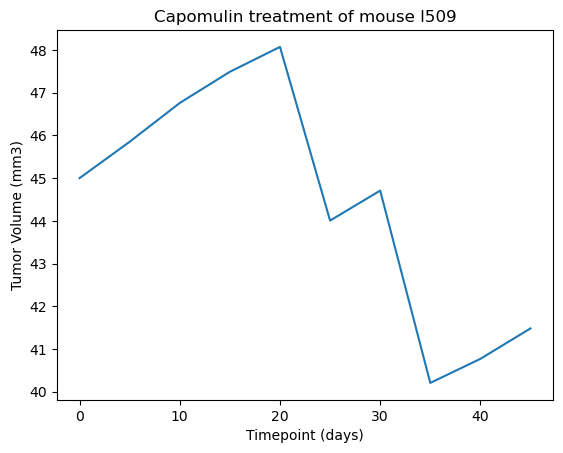

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']

plt.plot(mousedata["Timepoint"],mousedata["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

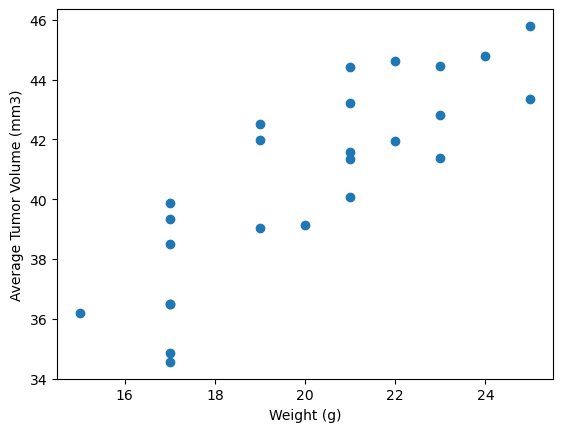

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]

capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between weight and tumor volume is 0.84


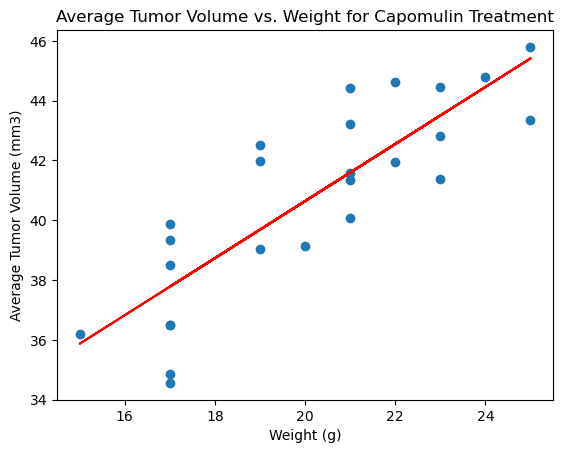

In [30]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_table = capomulin_table[capomulin_table["Drug Regimen"]=="Capomulin"]

x = capomulin_table.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})['Weight (g)']
y = capomulin_table.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})['Tumor Volume (mm3)']

correlation = x.corr(y)
print("The correlation between weight and tumor volume is", round(correlation, 2))

slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
y2 = (slope * x) + intercept

plt.scatter(x, y)
plt.plot(x, y2, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Capomulin Treatment")
plt.show()